In [1]:
import torch
import os
from IPython.display import Image, clear_output
import pytesseract
import cv2
from PIL import Image
import numpy

from colorama import init , Fore
init(autoreset=True)

path = '.\yolov5'
os.chdir(path)
print(os.getcwd())


c:\Users\asus zephyrus\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [54]:
import tkinter as tk
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
import cv2 
from tkinter import *
from tkinter import ttk
from PIL import ImageTk, Image
from tkinter import filedialog
import os
root = Tk()
root.title('Verification')

width= root.winfo_screenwidth()
height= root.winfo_screenheight()
root.geometry("%dx%d" % (width, height))
root['background']='#856ff8'

# create styling
styl = ttk.Style()
styl.configure('grey.TSeparator', background='#856ff8')
styl.configure('black.TSeparator', background='black')
#Verification list
verification_list = ['4941811016','0124811316','01233811416','3938910616','1102611116','02126711916','01409211516','05636511616','3865410816','05408511316','02284111916','0167730735','5663611016','4249911216','06835211316','07098911916','05519511316','00478211416','07619510816','04002011716','02852811516','04910811616','9727511216','09977711316','7302011116','0542511809','02042511916','4258711016','0222411217','4941811016','0124811316','01233811416','3938910616','1102611116','021267111916','01409211516','05636511616','3865410816','05408511316','02284111916','0167730735','5663611016','1694810916','4249911216','06835211316','07098911916','05519511316','00478211416','07619510816','04002011716','02852811516','4258711016','0222411217','4941811016','0124811316','01233811416','3938910616','1102611116','02126711916','01409211516','05636511616','3865410816','05408511316','02284111916','0167730735','5663611016','1694810916','4249911216','06835211316','07098911916','05519511316','00478211416','07619510816','04002011716','02852811516','04910811616','9727511216','09977711316','7302011116','0542511809','02042511916','4258711016','0222411217','4941811016','0124811316','3938910616','1102611116','02126711916','01409211516','05636511616','3865410816','05408511316','02284111916','0167730735','5663611016','1694810916','4249911216','06835211316','07098911916','05519511316','00478211416','07619510816','04002011716','02852811516','04910811616','09977711316','7302011116','0542511809','02042511916']
def UploadAction(event=None):
    
    filename = filedialog.askopenfilename()
    # renaming the picture so it can be used
    shutil.copy2(os.path.join(filename,filename), r'C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5')
    new_name = r"C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5\plate.jpg"
    os.rename(filename, new_name)
    image1 = Image.open(r'C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5\plate.jpg')
    width, height = image1.size
    newsize = (460, 290)
    im1 = image1.resize(newsize)
    test = ImageTk.PhotoImage(im1)
    #test.resize(200,200)
    label1 = tk.Label(image=test)
    label1.image = test

# Position image
    label1.place(x=70, y=185)
def detect():
    !python detect.py --weights best.pt  --source plate.jpg  --save-crop
    #post processing
def takepic():
    os.startfile(r"C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5\takepic.py", operation="open")

def showres():
    path1= r'C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5\runs\detect\exp2\crops\license\plate.jpg'
    pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\\Tesseract-OCR\\tesseract.exe'
    img = cv2.imread(path1)
    data = pytesseract.image_to_string(img, lang='eng+fra', config='--psm 10 --oem 3 -c tessedit_char_whitelist=G0123456789')
    print(data)
    x = "Registration Number is " + data
    correct_plates = 0
    places = []
    for k in range(len(verification_list)):
        if len(data)-len(verification_list[k]) >= 2:
            if (data[1:6] == verification_list[k][0:5]):
                correct_plates += 1
                places.append(k)

        elif len(data)-len(verification_list[k]) == 1:
            if (data[1:6] == verification_list[k][1:6]):
                correct_plates += 1
                places.append(k)
        else:
            if (data[0:5] == verification_list[k][0:5]):
                correct_plates += 1
                places.append(k)
    if correct_plates > 0:
        Label(root,text="AUTHORIZED",font="Helvetica",bg='blue', fg='GREEN',pady=8, padx=120).place(x=160,y=600) 
    else:
        Label(root,text="NOT AUTHORIZED",font="Helvetica",bg='blue', fg='RED',pady=8, padx=120).place(x=160,y=600) 
    Result1.insert(tk.END, x)
    return data
def clear():
    Result1.delete('1.0', END)
    Label(root,text="",font="Helvetica",bg='blue', fg='#f00',pady=8, padx=144).place(x=160,y=600) 
    os.remove("plate.jpg")
    shutil.rmtree(r'C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5\runs\detect\exp2')

Label(root,text="PARKING LOT MANAGER",font="Helvetica",bg='#fff', fg='#f00',pady=8, padx=500).place(x=108,y=30) 
Label(root,text="",font="Helvetica",bg='blue', fg='#f00',pady=8, padx=144).place(x=160,y=600) 
Label(root,text="License plate :",font="Helvetica",bg='#856ff8', fg='black',pady=5, padx=20).place(x=30,y=550) 
Label(root,text="driver's information :",font="Helvetica",bg='#856ff8', fg='black',pady=5, padx=20).place(x=720,y=90) 

Label(root,text="Function :",font="Helvetica",bg='#856ff8', fg='black',pady=5, padx=20).place(x=850,y=360) 
Label(root,text="Grade :",font="Helvetica",bg='#856ff8', fg='black',pady=5, padx=20).place(x=860,y=415) 
Label(root,text="Office number :",font="Helvetica",bg='#856ff8', fg='black',pady=5, padx=20).place(x=820,y=470) 
Label(root,text="Entry Date :",font="Helvetica",bg='#856ff8', fg='black',pady=5, padx=20).place(x=835,y=525) 

Label(root,text="Name :",font="Helvetica",bg='#856ff8', fg='black',pady=5, padx=20).place(x=1150,y=150) 
Label(root,text="Last Name :",font="Helvetica",bg='#856ff8', fg='black',pady=5, padx=20).place(x=1130,y=200) 
Label(root,text="Phone Number :",font="Helvetica",bg='#856ff8', fg='black',pady=5, padx=20).place(x=1120,y=250) 
#Label(root,text="Authorisation :",font="Helvetica",bg='#856ff8', fg='black',pady=5, padx=20).place(x=30,y=600) 
Button(root,text='Detect The board',font=('Helvetica',10),activebackground="black",command=detect,activeforeground="white").place(x=240,y=130)
Button(root,text='Take Picture',font=('Helvetica',10),command=takepic,activebackground="black",activeforeground="white").place(x=90,y=130)
Button(root,text='Import Picture',font=('Helvetica',10),command=UploadAction,activebackground="black",activeforeground="white").place(x=410,y=130)
Button(root,text='Access Verification',font=('Helvetica',10),activebackground="black",command=showres,activeforeground="white").place(x=140,y=500)
Button(root,text='Clear Results',font=('Helvetica',10),activebackground="black",command=clear,activeforeground="white").place(x=350,y=500)

# Separators object
separator2 = ttk.Separator(root, orient='horizontal', style='grey.TSeparator')
separator2.place(relx=0, rely=0.1, relwidth=1, relheight=0.01)
separator2 = ttk.Separator(root, orient='horizontal', style='grey.TSeparator')
separator2.place(relx=0.47, rely=0.15, relwidth=1, relheight=0.01)
separator3 = ttk.Separator(root, orient='horizontal', style='grey.TSeparator')
separator3.place(relx=0.47, rely=0.4, relwidth=1, relheight=0.01)
separator1 = ttk.Separator(root, orient='vertical',style='grey.TSeparator')
separator1.place(relx=0.47, rely=0.11, relwidth=0.01, relheight=1.8)
separator1 = ttk.Separator(root, orient='vertical',style='grey.TSeparator')
separator1.place(relx=0.73, rely=0.15, relwidth=0.01, relheight=0.25)







Result1 = Text(root, height=2, width=36)
Result1.place(x=200,y=550)
#Result2 = Text(root, height=2, width=36)
#Result2.place(x=200,y=600)
name = Text(root, height=1.5, width=25)
name.place(x=1300,y=150)
lname = Text(root, height=1.5, width=25)
lname.place(x=1300,y=200)
pnumb = Text(root, height=1.5, width=25)
pnumb.place(x=1300,y=250)
post = Text(root, height=1.5, width=50)
post.place(x=1110,y=360)
Postion_rank = Text(root, height=1.5, width=50)
Postion_rank.place(x=1110,y=415)
desk_numb = Text(root, height=1.5, width=50)
desk_numb.place(x=1110,y=470)
Email = Text(root, height=1.5, width=50)
Email.place(x=1110,y=525)

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\asus zephyrus\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\asus zephyrus\AppData\Local\Temp\ipykernel_62448\2193155924.py", line 31, in UploadAction
    os.rename(filename, new_name)
FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: 'C:/Users/asus zephyrus/Desktop/photo-1558900149-43462324765c.jfif' -> 'C:\\Users\\asus zephyrus\\Desktop\\localisation et reconnaissance des  matricules\\yolov5\\plate.jpg'
c:\Users\asus zephyrus\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
detect: weights=['best.pt'], source=plate.jpg, data=data\coco12

730393



Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\asus zephyrus\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\asus zephyrus\AppData\Local\Temp\ipykernel_62448\2193155924.py", line 81, in clear
    os.remove("plate.jpg")
FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable: 'plate.jpg'


## The making of a loop that detects all Plates numbers and save them into a text file !

In [13]:
plates_path = r'C:\Users\asus zephyrus\Desktop\plates'
from os import walk

filenames = next(walk(plates_path), (None, None, []))[2]  # [] if no file

In [14]:
print(filenames[0])
print(f'the total number of pictures in this directory is : {len(filenames)}')

18_20210801_101621.jpg
the total number of pictures in this directory is : 108


##### Passing the detection algorithm on each picture and saving it's value

In [69]:
numbers = []
for i in range(len(filenames)):
    picture = r'C:\Users\asus zephyrus\Desktop\plates' +'\\'+ filenames[i]
    shutil.copy2(os.path.join(picture,picture), r'C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5')
    new_name = r"C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5\plate.jpg"
    os.rename(picture, new_name)

    !python detect.py --weights best.pt  --source plate.jpg  --save-crop
    #post processing
    image = cv2.imread(r'C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5\runs\detect\exp2\crops\license\plate.jpg')
    y=100
    x=0
    h=1900
    w=510
    crop_image = image[x:w, y:h]
    cv2.imwrite(r'C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5\runs\detect\exp2\crops\license\plate.jpg', crop_image)
    
    path2= r'C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5\runs\detect\exp2\crops\license\plate.jpg'
    pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\\Tesseract-OCR\\tesseract.exe'
    img = cv2.imread(path2)
    data = pytesseract.image_to_string(img, lang='eng+fra', config='--psm 10 --oem 3 -c tessedit_char_whitelist=G0123456789')
    numbers.append(str(data))
    shutil.rmtree(r'C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5\runs\detect\exp2')
    os.remove("plate.jpg")

c:\Users\asus zephyrus\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
detect: weights=['best.pt'], source=plate.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\asus': No such file or directory
YOLOv5  2022-11-20 Python-3.10.4 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
image 1/1 C:\Users\asus zephy

^C


TypeError: 'NoneType' object is not subscriptable

c:\Users\asus zephyrus\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
detect: weights=['best.pt'], source=plate.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\asus': No such file or directory
YOLOv5  2022-11-20 Python-3.10.4 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
image 1/1 C:\Users\asus zephy

In [7]:
with open("file.txt", "w") as output:
    output.write(str(numbers))

In [8]:
numbers

['02042511916\n',
 '10222411217\n',
 '49418110164\n',
 '10124811316\n',
 '1G12338114168\n',
 '13938910616\n',
 '11102611116\n',
 '02126711916\n',
 '101409211516\n',
 '105636511616\n',
 '3865410816\n',
 '05408511316\n',
 '02284111916\n',
 '0167730735\n',
 '5663611016\n',
 '1694810916\n',
 '249911216\n',
 '106835211316\n',
 '107098911916\n',
 '05519517316\n',
 '100478211416\n',
 '167619516816\n',
 '104002011716\n',
 '02852811516\n',
 '04910811616\n',
 '1572751216\n',
 '09977711316\n',
 '7302011116\n',
 '10542511809\n',
 '102042511916\n',
 '14258711016\n',
 '10222411217\n',
 '49418110164\n',
 '10124811316\n',
 '13938910616\n',
 '1102611116\n',
 '02126711916\n',
 '101409211516\n',
 '105636511616\n',
 '3865410816\n',
 '05408511316\n',
 '02284111916\n',
 '0167730735\n',
 '5663611016\n',
 '1694810916\n',
 '249911216\n',
 '106835211316\n',
 '107098911916\n',
 '05519597316\n',
 '00478211416\n',
 '167619516816\n',
 '104002011716\n',
 '02852811516\n',
 '49418110164\n',
 '1012481131624\n',
 '1G123

102042511916



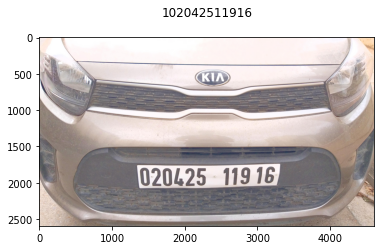

In [10]:
import matplotlib.pyplot as plt
import numpy as np
i = 78
xx = plt.imread(r'C:\Users\asus zephyrus\Desktop\plates' +'\\'+ filenames[i])
plt.imshow(xx), plt.title(numbers[i])
print(numbers[i])

In [15]:
verification_list = ['4941811016','0124811316','01233811416','3938910616','1102611116','02126711916','01409211516','05636511616','3865410816','05408511316','02284111916','0167730735','5663611016','4249911216','06835211316','07098911916','05519511316','00478211416','07619510816','04002011716','02852811516','04910811616','9727511216','09977711316','7302011116','0542511809','02042511916','4258711016','0222411217','4941811016','0124811316','01233811416','3938910616','1102611116','021267111916','01409211516','05636511616','3865410816','05408511316','02284111916','0167730735','5663611016','1694810916','4249911216','06835211316','07098911916','05519511316','00478211416','07619510816','04002011716','02852811516','4258711016','0222411217','4941811016','0124811316','01233811416','3938910616','1102611116','02126711916','01409211516','05636511616','3865410816','05408511316','02284111916','0167730735','5663611016','1694810916','4249911216','06835211316','07098911916','05519511316','00478211416','07619510816','04002011716','02852811516','04910811616','9727511216','09977711316','7302011116','0542511809','02042511916','4258711016','0222411217','4941811016','0124811316','3938910616','1102611116','02126711916','01409211516','05636511616','3865410816','05408511316','02284111916','0167730735','5663611016','1694810916','4249911216','06835211316','07098911916','05519511316','00478211416','07619510816','04002011716','02852811516','04910811616','09977711316','7302011116','0542511809','02042511916']
print(len(verification_list))

109


In [20]:
verification_list[108]

'02042511916'

### Verification Algorithm

In [19]:
i = 50
correct_plates = 0
places = []
for k in range(len(verification_list)):
    if len(numbers[i])-len(verification_list[k]) >= 2:
        if (numbers[i][1:6] == verification_list[k][0:5]):
            correct_plates += 1
            places.append(k)

    elif len(numbers[i])-len(verification_list[k]) == 1:
        if (numbers[i][1:6] == verification_list[k][1:6]):
            correct_plates += 1
            places.append(k)
    else:
        if (numbers[i][0:5] == verification_list[k][0:5]):
            correct_plates += 1
            places.append(k)
print(f'The total number of correct plates is {correct_plates} which are located in this verifications_list : {places} ')

The total number of correct plates is 4 which are located in this verifications_list : [18, 48, 72, 101] 


Post-Processing The images

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
img = Image.open(r'C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5\runs\detect\exp2\crops\license\plate.jpg')
img.show()

In [36]:
box = (250, 250, 750, 750)
img2 = img.crop(box)
img2.show()

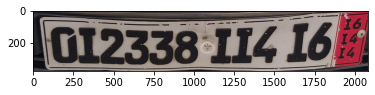

In [39]:
imgg = plt.imread(r'C:\Users\asus zephyrus\Desktop\localisation et reconnaissance des  matricules\yolov5\runs\detect\exp2\crops\license\plate.jpg')
plt.imshow(imgg)

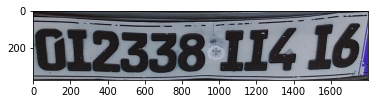